# Investment Analysis

## Loading Libraries

In [1]:
#import the required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#set the seaborn chart background style 
sns.set_style("whitegrid")


## Data Understanding

In [2]:
#load companies data into dataframe
companies = pd.read_csv('../dataset/companies.csv',encoding = "ISO-8859-1")
companies.head()

,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at
0,/Organization/-Fame,#fame,http://livfame.com,Media,operating,IND,16,Mumbai,Mumbai,NaN
1,/Organization/-Qounter,:Qounter,http://www.qounter.com,Application Platforms|Real Time|Social Network...,operating,USA,DE,DE - Other,Delaware City,04-09-2014
2,/Organization/-The-One-Of-Them-Inc-,"(THE) ONE of THEM,Inc.",http://oneofthem.jp,Apps|Games|Mobile,operating,NaN,NaN,NaN,NaN,NaN
3,/Organization/0-6-Com,0-6.com,http://www.0-6.com,Curated Web,operating,CHN,22,Beijing,Beijing,01-01-2007
4,/Organization/004-Technologies,004 Technologies,http://004gmbh.de/en/004-interact,Software,operating,USA,IL,"Springfield, Illinois",Champaign,01-01-2010


In [3]:
#load rounds2 data into dataframe
rounds2 = pd.read_csv('../dataset/rounds2.csv',encoding = "ISO-8859-1")
rounds2.head()

,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd
0,/organization/-fame,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,B,05-01-2015,10000000.0
1,/ORGANIZATION/-QOUNTER,/funding-round/22dacff496eb7acb2b901dec1dfe5633,venture,A,14-10-2014,NaN
2,/organization/-qounter,/funding-round/b44fbb94153f6cdef13083530bb48030,seed,NaN,01-03-2014,700000.0
3,/ORGANIZATION/-THE-ONE-OF-THEM-INC-,/funding-round/650b8f704416801069bb178a1418776b,venture,B,30-01-2014,3406878.0
4,/organization/0-6-com,/funding-round/5727accaeaa57461bd22a9bdd945382d,venture,A,19-03-2008,2000000.0


In [4]:
#load sector mapping data into dataframe
mapping = pd.read_csv('../dataset/mapping.csv',encoding = "ISO-8859-1")
mapping.head()

,category_list,Automotive & Sports,Blanks,Cleantech / Semiconductors,Entertainment,Health,Manufacturing,"News, Search and Messaging",Others,"Social, Finance, Analytics, Advertising"
0,NaN,0,1,0,0,0,0,0,0,0
1,3D,0,0,0,0,0,1,0,0,0
2,3D Printing,0,0,0,0,0,1,0,0,0
3,3D Technology,0,0,0,0,0,1,0,0,0
4,Accounting,0,0,0,0,0,0,0,0,1


In [5]:
#load all english speaking countries to a list
engspeakingcountries = ['BWA','CMR','ETH','ERI','GMB','GHA','KEN','LSO','LBR','MWI','MUS','NAM','NGA','RWA','SYC','SLE','ZAF','SDN','SWZ','TAN','UGA','ZMB','ZWE','ATG','BHS','BRB','BLZ','CAN','DMA','GRD','GUY','JAM','TTO','USA','IND','PAK','PHL','SGP','AUS','FJI','KIR','MHL','NRU','NZL','PLW','PNG','WSM','SLB','TON','TUV','VUT','IRL','MLT','GBR']

In [6]:
# Check for the missing values and datatype of each column
companies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 66368 entries, 0 to 66367
Data columns (total 10 columns):
permalink        66368 non-null object
name             66367 non-null object
homepage_url     61310 non-null object
category_list    63220 non-null object
status           66368 non-null object
country_code     59410 non-null object
state_code       57821 non-null object
region           58338 non-null object
city             58340 non-null object
founded_at       51147 non-null object
dtypes: object(10)
memory usage: 5.1+ MB


In [7]:
# Check for the missing values and datatype of each column
rounds2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 114949 entries, 0 to 114948
Data columns (total 6 columns):
company_permalink          114949 non-null object
funding_round_permalink    114949 non-null object
funding_round_type         114949 non-null object
funding_round_code         31140 non-null object
funded_at                  114949 non-null object
raised_amount_usd          94959 non-null float64
dtypes: float64(1), object(5)
memory usage: 5.3+ MB


In [8]:
# Check for the missing values and datatype of each column
mapping.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 688 entries, 0 to 687
Data columns (total 10 columns):
category_list                              687 non-null object
Automotive & Sports                        688 non-null int64
Blanks                                     688 non-null int64
Cleantech / Semiconductors                 688 non-null int64
Entertainment                              688 non-null int64
Health                                     688 non-null int64
Manufacturing                              688 non-null int64
News, Search and Messaging                 688 non-null int64
Others                                     688 non-null int64
Social, Finance, Analytics, Advertising    688 non-null int64
dtypes: int64(9), object(1)
memory usage: 53.8+ KB


## Data Cleaning

In [9]:
#Convert permalink values to lowercase
companies['permalink'] = companies.permalink.str.lower()

#Trim the permalink values
companies['permalink'] = companies.permalink.str.strip()

# Find How many unique companies are present in the companies?
dfCompanies_unique = pd.DataFrame(companies.permalink.unique())
print('Total number of unique companies present in companies dataset are : ',len(dfCompanies_unique))

Total number of unique companies present in companies dataset are :  66368


In [10]:
#Convert permalink values to lowercase
rounds2['company_permalink'] = rounds2.company_permalink.str.lower()

#Trim the permalink values 
rounds2['company_permalink'] = rounds2.company_permalink.str.strip()

#Find How many unique companies are present in rounds2?
dfRounds2_unique = pd.DataFrame(rounds2.company_permalink.unique())
print('Total number of unique companies present in rounds2 dataset are : ',len(dfRounds2_unique))

Total number of unique companies present in rounds2 dataset are :  66370


In [11]:
#Find if any companies in the rounds2 dataset which are not present in companies ?
rounds2.loc[~rounds2.company_permalink.isin(companies.permalink)]


#dfMissingRounds2InCompanies = pd.merge(dfCompanies_unique, dfRounds2_unique, how='right', indicator=True)
#MissingRounds2Count = dfMissingRounds2InCompanies[dfMissingRounds2InCompanies['_merge'] == 'right_only' ].count()
#print('Total number of companies in rounds2 that are not present in companies dataset are : ', MissingRounds2Count[0])

,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd
29597,/organization/e-cãbica,/funding-round/8491f74869e4fe8ba9c378394f8fbdea,seed,NaN,01-02-2015,NaN
31863,/organization/energystone-games-çµç³æ¸¸æ,/funding-round/b89553f3d2279c5683ae93f45a21cfe0,seed,NaN,09-08-2014,NaN
45176,/organization/huizuche-com-æ ç§ÿè½¦,/funding-round/8f8a32dbeeb0f831a78702f83af78a36,seed,NaN,18-09-2014,NaN
58473,/organization/magnet-tech-ç£ç³ç§æ,/funding-round/8fc91fbb32bc95e97f151dd0cb4166bf,seed,NaN,16-08-2014,1625585.0
101036,/organization/tipcat-interactive-æ²èÿä¿¡æ¯ç...,/funding-round/41005928a1439cb2d706a43cb661f60f,seed,NaN,06-09-2010,NaN
109969,/organization/weiche-tech-åè½¦ç§æ,/funding-round/f74e457f838b81fa0b29649740f186d8,venture,A,06-09-2015,NaN
113839,/organization/zengame-ç¦ æ¸¸ç§æ,/funding-round/6ba28fb4f3eadf5a9c6c81bc5dde6cdf,seed,NaN,17-07-2010,NaN


Company permalink seem to have some weird characters which could be a encoding/decoding problem. Let's check it out now.

In [12]:
rounds2['company_permalink'] = rounds2.company_permalink.str.encode('utf-8').str.decode('ascii', 'ignore')
rounds2.loc[~rounds2['company_permalink'].isin(companies['permalink']), :]

,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd
77,/organization/10north,/funding-round/b41ff7de932f8b6e5bbeed3966c0ed6a,equity_crowdfunding,NaN,12-08-2014,NaN
729,/organization/51wofang-,/funding-round/346b9180d276a74e0fbb2825e66c6f5b,venture,A,06-07-2015,5000000.0
2670,/organization/adslinked,/funding-round/449ae54bb63c768c232955ca6911dee4,seed,NaN,29-09-2014,100000.0
3166,/organization/aesthetic-everything-social-network,/funding-round/62593455f1a69857ed05d5734cc04132,equity_crowdfunding,NaN,12-10-2014,NaN
3291,/organization/affluent-attach-club-2,/funding-round/626678bdf1654bc4df9b1b34647a4df1,seed,NaN,15-10-2014,100000.0
4568,/organization/allgu-outlet,/funding-round/49e8a9b54ed19c8505ca92dc031a8e9c,venture,NaN,17-03-2015,1400000.0
8097,/organization/asiansbook,/funding-round/3f243ab92b4fe397d41b4734a17ca5f0,seed,NaN,15-09-2014,100000.0
8652,/organization/atlye-gri,/funding-round/75bdeacd95a647108aa4bc480e77894d,grant,NaN,01-11-2012,13940.0
9784,/organization/axgaz,/funding-round/511a41181aaf193bbd419babfb8d66e9,venture,NaN,06-07-2015,4094392.0
14311,/organization/boral-bikes-incorporated,/funding-round/be79575bf4b5b5d6fa64670800a3ca5e,seed,NaN,26-02-2015,NaN


Now it seem to be decoded properly.

In [13]:
# companies present in companies df but not in rounds df
companies.loc[~companies['permalink'].isin(rounds2['company_permalink']), :]

,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at
43,/organization/10â°north,10Â°North,NaN,Fashion,operating,CAN,ON,Toronto,Mississauga,05-01-2013
426,/organization/51wofang-æ å¿§ææ¿,51wofang æ å¿§ææ¿,http://www.51wofang.com,NaN,closed,NaN,NaN,NaN,NaN,01-01-2014
1506,/organization/adslinkedâ¢,AdsLinkedâ¢,http://www.adslinked.com,Advertising|Internet,operating,NaN,NaN,NaN,NaN,NaN
1775,/organization/aesthetic-everythingâ®-social-ne...,Aesthetic EverythingÂ® Social Network,http://aestheticeverything.com/,Public Relations,operating,USA,CA,Los Angeles,Marina Del Rey,15-06-2009
1834,/organization/affluent-attachã©-club-2,Affluent AttachÃ© Club,http://www.affluentattache.com/,Hospitality,operating,USA,CA,Los Angeles,Beverly Hills,NaN
2556,/organization/allgã¤u-outlet,AllgÃ¤u Outlet,http://allgaeuoutlet.de/,Fashion,operating,DEU,2,DEU - Other,Sonthofen,NaN
4567,/organization/asiansbookâ¢,Asiansbookâ¢,http://www.asiansbook.com,Social Media|Social Network Media,operating,NaN,NaN,NaN,NaN,NaN
4903,/organization/atã¶lye-gri,AtÃ¶lye Gri,http://www.atolyegri.com/,Advertising,operating,NaN,NaN,NaN,NaN,NaN
5490,/organization/axã¨gaz,AxÃ¨gaz,http://www.axegaz.com/,Energy,operating,FRA,A8,Paris,Levallois-perret,01-01-2012
8131,/organization/borã©al-bikes-incorporated,BorÃ©al Bikes Incorporated,http://www.borealbikes.com,Automotive|Design|Manufacturing,operating,DEU,16,Berlin,Berlin,01-01-2014


In [14]:
# remove encoding from companies df
companies['permalink'] = companies.permalink.str.encode('utf-8').str.decode('ascii', 'ignore')

In [15]:
# companies present in companies df but not in rounds df
companies.loc[~companies['permalink'].isin(rounds2['company_permalink']), :]

,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at


In [16]:
#Merge rounds2 and companies dataframes into master_frame on permalink unique key
master_frame = pd.merge(left=companies,right=rounds2, how='right', left_on='permalink', right_on='company_permalink')
master_frame.head()

,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd
0,/organization/-fame,#fame,http://livfame.com,Media,operating,IND,16,Mumbai,Mumbai,NaN,/organization/-fame,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,B,05-01-2015,10000000.0
1,/organization/-qounter,:Qounter,http://www.qounter.com,Application Platforms|Real Time|Social Network...,operating,USA,DE,DE - Other,Delaware City,04-09-2014,/organization/-qounter,/funding-round/22dacff496eb7acb2b901dec1dfe5633,venture,A,14-10-2014,NaN
2,/organization/-qounter,:Qounter,http://www.qounter.com,Application Platforms|Real Time|Social Network...,operating,USA,DE,DE - Other,Delaware City,04-09-2014,/organization/-qounter,/funding-round/b44fbb94153f6cdef13083530bb48030,seed,NaN,01-03-2014,700000.0
3,/organization/-the-one-of-them-inc-,"(THE) ONE of THEM,Inc.",http://oneofthem.jp,Apps|Games|Mobile,operating,NaN,NaN,NaN,NaN,NaN,/organization/-the-one-of-them-inc-,/funding-round/650b8f704416801069bb178a1418776b,venture,B,30-01-2014,3406878.0
4,/organization/0-6-com,0-6.com,http://www.0-6.com,Curated Web,operating,CHN,22,Beijing,Beijing,01-01-2007,/organization/0-6-com,/funding-round/5727accaeaa57461bd22a9bdd945382d,venture,A,19-03-2008,2000000.0


In [17]:
#Drop the column company_permalink which is duplicated due to merge
master_frame.drop('company_permalink',axis=1, inplace=True)

In [18]:
#Remove records with permalink value as null
master_frame = master_frame[master_frame.permalink.notnull()]

In [19]:
#Convert the funding amount to million USD and add it to new column in master_frame 
master_frame['usd_in_million'] = round(master_frame.raised_amount_usd.div(1000000),2)

print('master_frame Record count is : ',len(master_frame))

master_frame Record count is :  114949


In [20]:
#select the records with funding type in seed, angel, venture, private_equity
master_frame = master_frame[master_frame.funding_round_type.isin(['seed','angel','venture','private_equity'])]

#Remove records with amount value as null
master_frame = master_frame[master_frame.usd_in_million.notnull()]

In [21]:
#Find Average funding amount of each funding type
dfFundsAvg = round(master_frame.groupby('funding_round_type')['usd_in_million'].mean(),2).reset_index(name='avg_funding_amt')
dfFundsAvg

,funding_round_type,avg_funding_amt
0,angel,0.96
1,private_equity,73.31
2,seed,0.72
3,venture,11.75


In [22]:
#Find Average funding amount of each funding round in funding type
dfFundsAvgPerRound = round(master_frame.groupby(['funding_round_type','funding_round_code'])['usd_in_million'].mean(), 2).reset_index()
dfFundsAvgPerRound

,funding_round_type,funding_round_code,usd_in_million
0,angel,A,1.73
1,private_equity,A,32.95
2,private_equity,C,25.00
3,private_equity,H,50.00
4,seed,A,3.53
5,seed,B,1.62
6,seed,C,0.92
7,venture,A,6.99
8,venture,B,14.67
9,venture,C,21.39


In [23]:
#Select the records with venture funding type
master_frame_vnt = master_frame[master_frame.funding_round_type == 'venture']

#Remove records with country code as null
master_frame_vnt = master_frame_vnt[master_frame_vnt.country_code.notnull()]

In [24]:
#Find the total investment amount for each english speaking countries
dfTotalFundByCountry = pd.DataFrame(round(master_frame_vnt.groupby(['country_code'])['usd_in_million'].sum(), 2))

#order by high to low 
top9 = dfTotalFundByCountry.sort_values('usd_in_million', ascending = False).reset_index()

#select the top 9 countries
top9 = top9[top9.country_code.isin(engspeakingcountries)].head(9).reset_index()
top9


,index,country_code,usd_in_million
0,0,USA,422510.47
1,2,GBR,20245.59
2,3,IND,14391.91
3,4,CAN,9583.32
4,12,SGP,2793.94
5,15,IRL,1676.15
6,17,AUS,1322.93
7,29,NZL,448.32
8,36,NGA,245.44


In [25]:
#pick the top 3 countries from the list
country1 = top9.iloc[0].country_code
country2 = top9.iloc[1].country_code
country3 = top9.iloc[2].country_code

print('Top Country : ', country1)
print('Second Country : ', country2)
print('Third Country : ', country3)

Top Country :  USA
Second Country :  GBR
Third Country :  IND


In [26]:
#Remove records with category list as null
master_frame_vnt = master_frame_vnt[master_frame_vnt.category_list.notnull()]

#function to split the category list and pick the first value as primary sector
def splitSector(row):
    categorylist = row['category_list'].split('|')
    return categorylist[0]

#apply the split function in the data frame
master_frame_vnt['primary_sector'] = master_frame_vnt.apply(splitSector,axis=1)

In [27]:
#function to main_sector from the mapping dataset
def get_main_sector():    
    main_sector=[]
    for i in range(0, len(mapping)):
        for col in mapping.columns:
            if(mapping.iloc[i][col] == 1):
                main_sector.append(col)
                break
        
    mapping['main_sector'] = main_sector

get_main_sector()

mappingdf = pd.DataFrame(mapping, columns=['category_list', 'main_sector'])

In [28]:
#Merge master_frame_vnt and mappingdf dataframes on primary_sector
master_frame_vnt = pd.merge(left=master_frame_vnt,right=mappingdf, how='left', left_on='primary_sector', right_on='category_list')

#Drop the column category_list_y which is duplicated due to merge
master_frame_vnt.drop('category_list_y',axis=1, inplace=True)

#Remove records with main_sector as Blanks
master_frame_vnt = master_frame_vnt[master_frame_vnt.main_sector != 'Blanks']

#Remove records with main_sector value as null
master_frame_vnt = master_frame_vnt[master_frame_vnt.main_sector.notnull()]
master_frame_vnt.head()

,permalink,name,homepage_url,category_list_x,status,country_code,state_code,region,city,founded_at,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd,usd_in_million,primary_sector,main_sector
0,/organization/-fame,#fame,http://livfame.com,Media,operating,IND,16,Mumbai,Mumbai,NaN,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,B,05-01-2015,10000000.0,10.00,Media,Entertainment
1,/organization/0-6-com,0-6.com,http://www.0-6.com,Curated Web,operating,CHN,22,Beijing,Beijing,01-01-2007,/funding-round/5727accaeaa57461bd22a9bdd945382d,venture,A,19-03-2008,2000000.0,2.00,Curated Web,"News, Search and Messaging"
2,/organization/0ndine-biomedical-inc,Ondine Biomedical Inc.,http://ondinebio.com,Biotechnology,operating,CAN,BC,Vancouver,Vancouver,01-01-1997,/funding-round/954b9499724b946ad8c396a57a5f3b72,venture,NaN,21-12-2009,719491.0,0.72,Biotechnology,Cleantech / Semiconductors
6,/organization/1-mainstream,1 Mainstream,http://www.1mainstream.com,Apps|Cable|Distribution|Software,acquired,USA,CA,SF Bay Area,Cupertino,01-03-2012,/funding-round/b952cbaf401f310927430c97b68162ea,venture,NaN,17-03-2015,5000000.0,5.00,Apps,"News, Search and Messaging"
7,/organization/10-minutes-with,10 Minutes With,http://10minuteswith.com,Education,operating,GBR,H9,London,London,01-01-2013,/funding-round/0faccbbcc5818dc5326469f13f5a8ac8,venture,A,09-10-2014,4000000.0,4.00,Education,Others


In [29]:

#create seperate data frame for each top 3 countries from the master frame
D1 = master_frame_vnt[master_frame_vnt.country_code == country1]
D2 = master_frame_vnt[master_frame_vnt.country_code == country2]
D3 = master_frame_vnt[master_frame_vnt.country_code == country3]


In [30]:

#Find total number of investments for country1
D1_TotalNumberOfInvestments = pd.DataFrame(D1.groupby(['main_sector']).size().reset_index(name='total_inv_cnt'))

#Find total investment amount for country1
D1_TotalAmountOfInvestments = pd.DataFrame(D1.groupby(['main_sector'])['usd_in_million'].sum().reset_index(name='total_amt_inv'))

#merge and sort the result data frame 
D1_Final = D1_TotalNumberOfInvestments.merge(D1_TotalAmountOfInvestments)
D1_Final = D1_Final.sort_values('total_inv_cnt',ascending=False)

D1_TotalCount = D1_Final['total_inv_cnt'].sum()
D1_TotalAmount = round(D1_Final['total_amt_inv'].sum(),2)
D1_TopSector = D1_Final['main_sector'].iloc[0]
D1_SecondSector = D1_Final['main_sector'].iloc[1]
D1_ThirdSector = D1_Final['main_sector'].iloc[2]
D1_TopSectorTotalInv = D1_Final['total_inv_cnt'].iloc[0]
D1_SecondSectorTotalInv = D1_Final['total_inv_cnt'].iloc[1]
D1_ThirdSectorTotalInv = D1_Final['total_inv_cnt'].iloc[2]
    
print(country1, ' - Country-1 Stats')
print('TotalCount :', D1_TotalCount)
print('TotalAmount :', D1_TotalAmount)
print('TopSector :', D1_TopSector)
print('SecondSector :', D1_SecondSector)
print('ThirdSector :', D1_ThirdSector)
print('TopSectorTotalInv :', D1_TopSectorTotalInv)
print('SecondSectorTotalInv :', D1_SecondSectorTotalInv)
print('ThirdSectorTotalInv :', D1_ThirdSectorTotalInv)



USA  - Country-1 Stats
TotalCount : 33526
TotalAmount : 392237.29
TopSector : Others
SecondSector : Cleantech / Semiconductors
ThirdSector : Social, Finance, Analytics, Advertising
TopSectorTotalInv : 8243
SecondSectorTotalInv : 7849
ThirdSectorTotalInv : 5156


In [31]:
#Find total number of investments for country2
D2_TotalNumberOfInvestments = pd.DataFrame(D2.groupby(['main_sector']).size().reset_index(name='total_inv_cnt'))

#Find total investment amount for country2
D2_TotalAmountOfInvestments = pd.DataFrame(D2.groupby(['main_sector'])['usd_in_million'].sum().reset_index(name='total_amt_inv'))

#merge and sort the result data frame 
D2_Final = D2_TotalNumberOfInvestments.merge(D2_TotalAmountOfInvestments)
D2_Final = D2_Final.sort_values('total_inv_cnt',ascending=False)

D2_TotalCount = D2_Final['total_inv_cnt'].sum()
D2_TotalAmount = round(D2_Final['total_amt_inv'].sum(),2)
D2_TopSector = D2_Final['main_sector'].iloc[0]
D2_SecondSector = D2_Final['main_sector'].iloc[1]
D2_ThirdSector = D2_Final['main_sector'].iloc[2]
D2_TopSectorTotalInv = D2_Final['total_inv_cnt'].iloc[0]
D2_SecondSectorTotalInv = D2_Final['total_inv_cnt'].iloc[1]
D2_ThirdSectorTotalInv = D2_Final['total_inv_cnt'].iloc[2]
    
print(country2, ' - Country-2 Stats')
print('TotalCount :', D2_TotalCount)
print('TotalAmount :', D2_TotalAmount)
print('TopSector :', D2_TopSector)
print('SecondSector :', D2_SecondSector)
print('ThirdSector :', D2_ThirdSector)
print('TopSectorTotalInv :', D2_TopSectorTotalInv)
print('SecondSectorTotalInv :', D2_SecondSectorTotalInv)
print('ThirdSectorTotalInv :', D2_ThirdSectorTotalInv)



GBR  - Country-2 Stats
TotalCount : 1916
TotalAmount : 18924.37
TopSector : Others
SecondSector : Cleantech / Semiconductors
ThirdSector : Social, Finance, Analytics, Advertising
TopSectorTotalInv : 507
SecondSectorTotalInv : 433
ThirdSectorTotalInv : 318


In [32]:

#Find total number of investments for country3
D3_TotalNumberOfInvestments = pd.DataFrame(D3.groupby(['main_sector']).size().reset_index(name='total_inv_cnt'))

#Find total investment amount for country3
D3_TotalAmountOfInvestments = pd.DataFrame(D3.groupby(['main_sector'])['usd_in_million'].sum().reset_index(name='total_amt_inv'))

#merge and sort the result data frame 
D3_Final = D3_TotalNumberOfInvestments.merge(D3_TotalAmountOfInvestments)
D3_Final = D3_Final.sort_values('total_inv_cnt',ascending=False)

D3_TotalCount = D3_Final['total_inv_cnt'].sum()
D3_TotalAmount = round(D3_Final['total_amt_inv'].sum(),2)
D3_TopSector = D3_Final['main_sector'].iloc[0]
D3_SecondSector = D3_Final['main_sector'].iloc[1]
D3_ThirdSector = D3_Final['main_sector'].iloc[2]
D3_TopSectorTotalInv = D3_Final['total_inv_cnt'].iloc[0]
D3_SecondSectorTotalInv = D3_Final['total_inv_cnt'].iloc[1]
D3_ThirdSectorTotalInv = D3_Final['total_inv_cnt'].iloc[2]
    
print(country3, ' - Country-3 Stats')
print('TotalCount :', D3_TotalCount)
print('TotalAmount :', D3_TotalAmount)
print('TopSector :', D3_TopSector)
print('SecondSector :', D3_SecondSector)
print('ThirdSector :', D3_ThirdSector)
print('TopSectorTotalInv :', D3_TopSectorTotalInv)
print('SecondSectorTotalInv :', D3_SecondSectorTotalInv)
print('ThirdSectorTotalInv :', D3_ThirdSectorTotalInv)



IND  - Country-3 Stats
TotalCount : 745
TotalAmount : 13538.03
TopSector : Others
SecondSector : News, Search and Messaging
ThirdSector : Social, Finance, Analytics, Advertising
TopSectorTotalInv : 281
SecondSectorTotalInv : 130
ThirdSectorTotalInv : 77


In [33]:

#Get the company name with highest amount of investment in Top Country 1 in Top Sector
D1_TopSectorDet = D1[D1.main_sector == D1_TopSector]
D1_TopSectorDet = D1_TopSectorDet.sort_values(['usd_in_million'], ascending = False).head(1)
print('{0} is the highest investment company in the Top sector {1} in the country-1 {2}'.format(D1_TopSectorDet.iloc[0]['name'], D1_TopSector, country1 ))

#Get the company name with highest amount of investment in Top Country 1 in Second Sector
D1_SecSectorDet = D1[D1.main_sector == D1_SecondSector]
D1_SecSectorDet = D1_SecSectorDet.sort_values(['usd_in_million'], ascending = False).head(1)
print('{0} is the highest investment company in the Second sector {1} in the country-1 {2}'.format(D1_SecSectorDet.iloc[0]['name'], D1_SecondSector, country1 ))

#Get the company name with highest amount of investment in Top Country 2 in Top Sector
D2_TopSectorDet = D2[D2.main_sector == D2_TopSector]
D2_TopSectorDet = D2_TopSectorDet.sort_values(['usd_in_million'], ascending = False).head(1)
print('{0} is the highest investment company in the Top sector {1} in the country-2 {2}'.format(D2_TopSectorDet.iloc[0]['name'], D2_TopSector, country2 ))

#Get the company name with highest amount of investment in Top Country 2 in Second Sector
D2_SecSectorDet = D2[D2.main_sector == D2_SecondSector]
D2_SecSectorDet = D2_SecSectorDet.sort_values(['usd_in_million'], ascending = False).head(1)
print('{0} is the highest investment company in the Second sector {1} in the country-2 {2}'.format(D2_SecSectorDet.iloc[0]['name'], D2_SecondSector, country2 ))

#Get the company name with highest amount of investment in Top Country 3 in Top Sector
D3_TopSectorDet = D3[D3.main_sector == D3_TopSector]
D3_TopSectorDet = D3_TopSectorDet.sort_values(['usd_in_million'], ascending = False).head(1)
print('{0} is the highest investment company in the Top sector {1} in the country-3 {2}'.format(D3_TopSectorDet.iloc[0]['name'], D3_TopSector, country3 ))

#Get the company name with highest amount of investment in Top Country 3 in Second Sector
D3_SecSectorDet = D3[D3.main_sector == D3_SecondSector]
D3_SecSectorDet = D3_SecSectorDet.sort_values(['usd_in_million'], ascending = False).head(1)
print('{0} is the highest investment company in the Second sector {1} in the country-3 {2}'.format(D3_SecSectorDet.iloc[0]['name'], D3_SecondSector, country3 ))


SoFi is the highest investment company in the Top sector Others in the country-1 USA
Freescale Semiconductor is the highest investment company in the Second sector Cleantech / Semiconductors in the country-1 USA
OneWeb is the highest investment company in the Top sector Others in the country-2 GBR
Immunocore is the highest investment company in the Second sector Cleantech / Semiconductors in the country-2 GBR
Flipkart is the highest investment company in the Top sector Others in the country-3 IND
Quikr is the highest investment company in the Second sector News, Search and Messaging in the country-3 IND


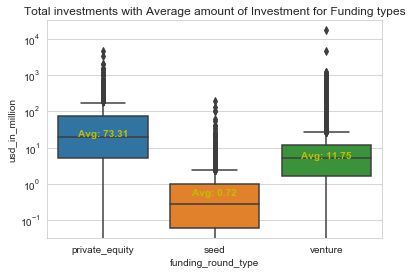

In [34]:

#Plot1 - Total investments with Average amount of Investment for Funding types
#Filter the data frame with funding types of seed, venture, private_equity
df = master_frame[master_frame.funding_round_type.isin(['seed','venture','private_equity'])]

#sort the values on funding type
df = df.sort_values('funding_round_type')

#seaborn basic boxplot setup
ax = sns.boxplot(x="funding_round_type", y="usd_in_million", data=df)

#set the Yscale fractioned as log
ax.set_yscale('log')

# Calculate mean values per group & median to position labels
medians = df.groupby(['funding_round_type'])['usd_in_million'].median().values
nobs = round(df.groupby(['funding_round_type'])['usd_in_million'].mean(), 2)
nobs = [str(x) for x in nobs.tolist()]
nobs = ["Avg: " + i for i in nobs]
 
# Add it to the plot
pos = range(len(nobs))
for tick,label in zip(pos,ax.get_xticklabels()):
    plt.text(pos[tick], medians[tick] + 0.2, nobs[tick], horizontalalignment='center', size='medium', color='y', weight='semibold')

#add title
plt.title("Total investments with Average amount of Investment for Funding types")

#Display the plot
plt.show()



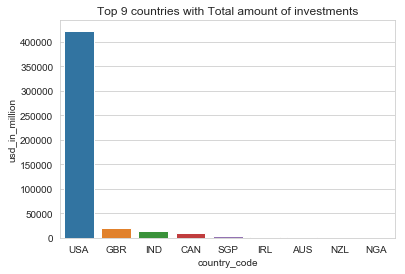

In [35]:

#Plot2 - Top 9 countries with Total amount of investments
#Seaborn barplot setup
sns.barplot(x='country_code', y='usd_in_million',data=top9)

#add title
plt.title("Top 9 countries with Total amount of investments")

#Display the plot
plt.show()


C:\Users\jsaikumar\Anaconda3\lib\site-packages\seaborn\categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
C:\Users\jsaikumar\Anaconda3\lib\site-packages\seaborn\categorical.py:3672: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


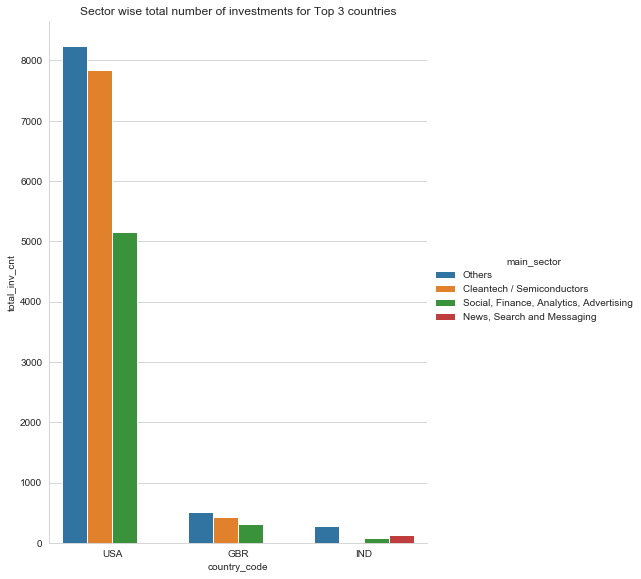

In [36]:

#Plot3 - Sector wise total number of investments for Top 3 countries
#Join the datasets of top 3 countries
dfFinal = D1.append(D2.append(D3))

#Get the total number of investments based on country and main_sector
TotalNumberOfInvestments = pd.DataFrame(dfFinal.groupby(['country_code','main_sector']).size().reset_index(name='total_inv_cnt'))

#sort the records on country and total investments
TotalNumberOfInvestments = TotalNumberOfInvestments.sort_values(['country_code','total_inv_cnt'], ascending=False)

#Top 3 investments for Country1
C1_TotalInv = TotalNumberOfInvestments[TotalNumberOfInvestments.country_code == country1].head(3)

#Top 3 investments for Country2
C2_TotalInv = TotalNumberOfInvestments[TotalNumberOfInvestments.country_code == country2].head(3)

#Top 3 investments for Country3
C3_TotalInv = TotalNumberOfInvestments[TotalNumberOfInvestments.country_code == country3].head(3)

#Join the data frames for the plot
plot3df = C1_TotalInv.append(C2_TotalInv.append(C3_TotalInv))

#Seaborn facotrplot setup
sns.factorplot(x='country_code', y='total_inv_cnt',hue='main_sector',data=plot3df, kind="bar", size=8, aspect=.8)

#add title
plt.title("Sector wise total number of investments for Top 3 countries")

#display the plot
plt.show()
